In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [11]:
MODEL = "gonzalobenegas/gpn-brassicales"
# MODEL = "kmers_3"
# MODEL = "kmers_6"

d = Path("output/embedding")
windows = pd.read_parquet(d / "windows.parquet")
windows["pred_Region"] = pd.read_parquet(
    d / "classification" / f"{MODEL}.parquet"
).pred_Region.values
region_renaming = {
    "intergenic": "Intergenic",
    "intron": "Intron",
    "ncRNA_gene": "ncRNA",
    "five_prime_UTR": "5' UTR",
    "three_prime_UTR": "3' UTR",
}
windows.Region = windows.Region.replace(region_renaming)
windows.pred_Region = windows.pred_Region.replace(region_renaming)
windows

,chrom,start,end,strand,center_start,center_end,Region,pred_Region
0,1,0,512,+,206,306,Intergenic,ncRNA
1,1,100,612,+,306,406,Intergenic,3' UTR
2,1,200,712,+,406,506,Intergenic,Intergenic
3,1,300,812,+,506,606,Intergenic,ncRNA
4,1,400,912,+,606,706,Intergenic,ncRNA
...,...,...,...,...,...,...,...,...
818088,5,26974534,26975046,+,26974740,26974840,Intergenic,Intergenic
818089,5,26974634,26975146,+,26974840,26974940,Intergenic,Intergenic
818090,5,26974734,26975246,+,26974940,26975040,Intergenic,Intergenic
818091,5,26974834,26975346,+,26975040,26975140,Intergenic,Intergenic


In [12]:
regions = windows.Region.value_counts().index.values

# Make sure Repeat goes last
if "Repeat" in regions:
    regions = regions[regions != "Repeat"].tolist() + ["Repeat"]
regions

['Intergenic', 'CDS', 'Intron', "3' UTR", "5' UTR", 'ncRNA', 'Repeat']

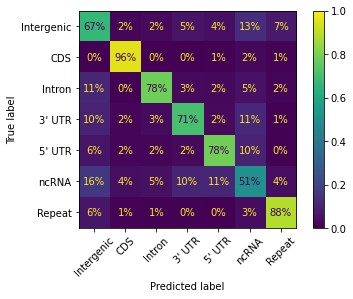

In [13]:
ConfusionMatrixDisplay.from_predictions(
    windows.Region,
    windows.pred_Region,
    normalize="true",
    labels=regions,
    values_format=".0%",
    im_kw=dict(vmin=0, vmax=1),
)
plt.xticks(rotation=45)
plt.savefig(
    f"output/plots/classification_{MODEL.replace('/', '_')}.svg", bbox_inches="tight"
)